# Genre classification using audio features

### Guillermo Aramburo Rodriguez

In [22]:
import glob
import librosa
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_predict
import random
import IPython.display as ipd

fnames = glob.glob(r"C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\*\*.wav")

genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']

# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 40))
target = np.zeros(len(fnames))

# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            mfcc_matrix = librosa.feature.mfcc(y=audio, sr=srate)
            mean_mfcc = np.mean(mfcc_matrix,axis=1)
            std_mfcc = np.std(mfcc_matrix, axis=1)
            audio_fvec = np.hstack([mean_mfcc, std_mfcc])
            audio_features[i] = audio_fvec
            target[i] = label

print(audio_features.shape)

Processing 0 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00000.wav
Processing 1 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00001.wav
Processing 2 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00002.wav
Processing 3 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00003.wav
Processing 4 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00004.wav
Processing 5 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\mir_program_kadenze\course2\data\genres_original\blues\blues.00005.wav
Processing 6 C:\Users\g.aramburorodriguez\OneDrive - L-Acoustics\Documents\Python\

In [23]:
clf = svm.SVC(gamma='scale', kernel='linear')
clf.fit(audio_features, target)
predicted = cross_val_predict(clf, audio_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[85  2  0  0 11  2  0  0  0  0]
 [ 0 50  9  0  7 12 11  5  5  1]
 [ 1  8 60 11  0  8  4  2  5  1]
 [ 0  2 10 61  0  1  5 17  1  3]
 [ 7  7  2  0 71  7  6  0  0  0]
 [ 0  7 19  5  3 36 18  3  3  6]
 [ 1 16  9  3 15  7 34  7  0  8]
 [ 2  7  9 23  1  3  4 45  5  1]
 [ 1  5 10  7  1  2  0  4 70  0]
 [ 0  3  4  9  0  9  3  1  0 71]]
Classification report for classifier SVC(kernel='linear'):
0.583



- Adapt the code to process the audio files you have downloaded on your own computer. Calculate using 10-fold cross-validation the classification accuracy and confusion matrix for this dataset using a linear SVM classifier and the sklearn Python framework for machine learning. Process the confusion matrix to display the musical genres sorted by classification accuracy from highest to lowest.

Classification report for classifier SVC(kernel='linear'):
0.583



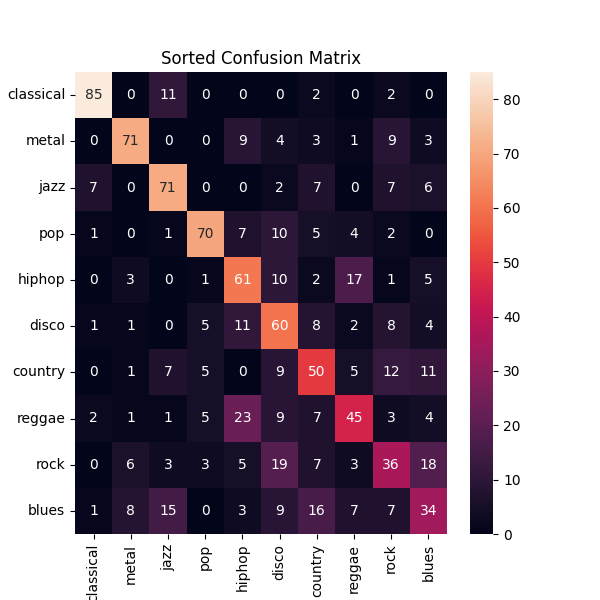

In [41]:
# perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
# Sort by diagonal values
idx = np.argsort(np.diag(cm))[::-1]
sortCm = cm[idx,:][:,idx]

# Sorted confusion matrix
df_cmSVM = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

# Sorted confusion matrix
df_Scm = pd.DataFrame(sortCm, index = [genres[i] for i in idx],
                  columns = [genres[i] for i in idx])

# Plot
plt.figure(figsize = (6,6))
plt.title("Sorted Confusion Matrix")
sn.heatmap(df_Scm, annot=True)

# SVM Info
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

- Compute the confusion matrix and and classification accuracy using the sklearn Naive Bayes classifier. Briefly comment on the similarities and differences between these results and the ones from the linear SVM.

SVM performs 12% better than the Naives-Bayes classifier. The confusion matrix shows that the uncertainties for the classifiers are different. For example, the SVM classifier tends to confuses jazz with blues most of the times while the Naives-Bayes classifier tends to confuse jazz with classical most of the times.

Classification report for classifier GaussianNB():
0.463



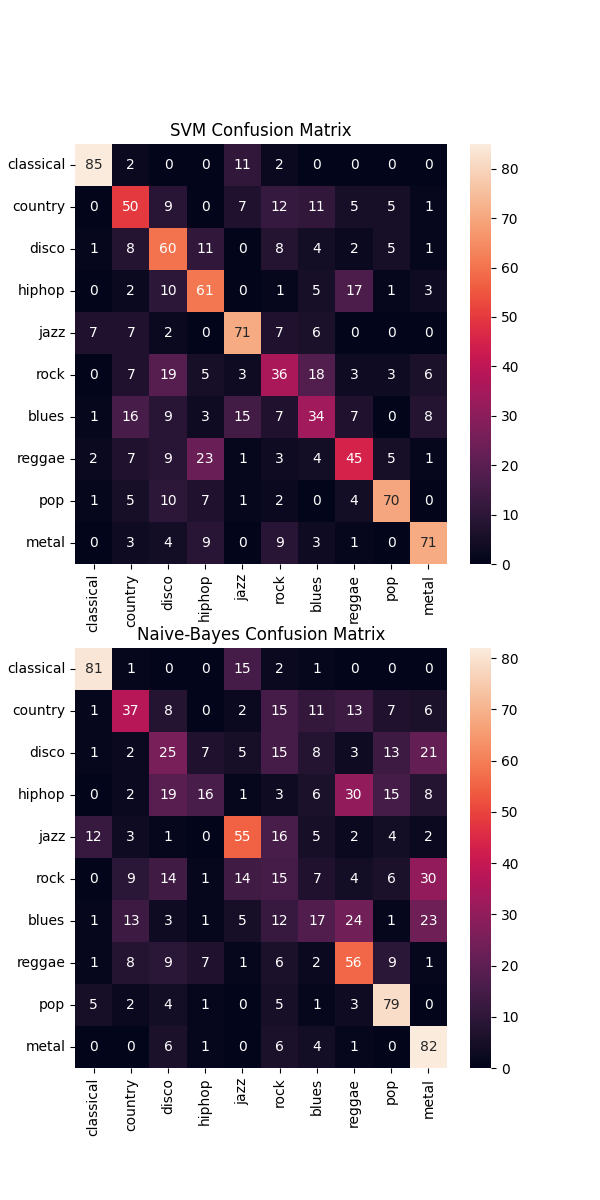

In [45]:
from sklearn import naive_bayes as nb

# Create classifier
clf2 = nb.GaussianNB()
# Fit with data
clf2.fit(audio_features, target)
# Perfrom 10 fold cross-validation
predNB = cross_val_predict(clf2, audio_features, target, cv=10)

# Get confusion matrix
cm = metrics.confusion_matrix(target, predNB) 

# Confusion matrix
df_cmNB = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

# Compare!
plt.figure(figsize = (6,12))
plt.subplot(2,1,1)
plt.title("SVM Confusion Matrix")
sn.heatmap(df_cmSVM, annot=True)
plt.subplot(2,1,2)
plt.title("Naive-Bayes Confusion Matrix")
sn.heatmap(df_cmNB, annot=True)
print("Classification report for classifier %s:\n%s\n"
      % (clf2, metrics.accuracy_score(target, predNB)))

- Replace the computation of the MFCCs from librosa with computing the CQT transform. Contrast the confusion matrix and classification accuracy comparing these two feature extraction strategies.